In [42]:
!pip3 install torch

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

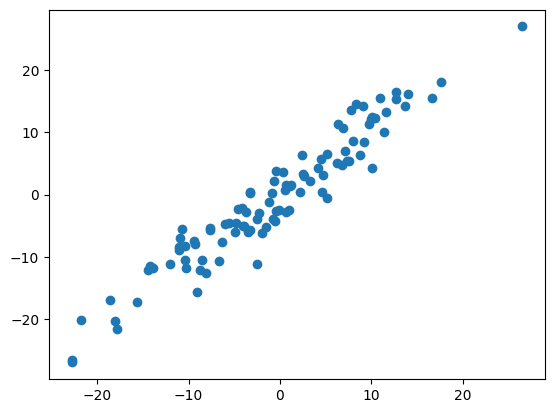

In [3]:
X = torch.randn(100,1)*10
y = X + torch.randn(100,1)*3
plt.plot(X,y,'o')

In [4]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(in_features=input_size,out_features=output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
torch.manual_seed(1)
model = LR(1, 1)
print(model.parameters)

<bound method Module.parameters of LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>


In [6]:
[w, b] = model.parameters()

def get_params():
  return (w[0][0].item(),b[0].item())

In [7]:
from matplotlib.font_manager import X11FontDirectories
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,y)
  plt.show()

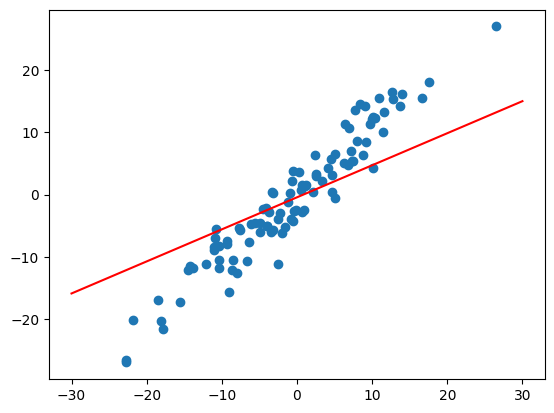

In [8]:
plot_fit('Initial Model')

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [19]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch: ", i, "loss: ", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch:  0 loss:  8.354731559753418
epoch:  1 loss:  8.354540824890137
epoch:  2 loss:  8.354357719421387
epoch:  3 loss:  8.354180335998535
epoch:  4 loss:  8.354009628295898
epoch:  5 loss:  8.35384750366211
epoch:  6 loss:  8.353690147399902
epoch:  7 loss:  8.35353946685791
epoch:  8 loss:  8.35339641571045
epoch:  9 loss:  8.353257179260254
epoch:  10 loss:  8.353121757507324
epoch:  11 loss:  8.352993965148926
epoch:  12 loss:  8.352871894836426
epoch:  13 loss:  8.352753639221191
epoch:  14 loss:  8.352639198303223
epoch:  15 loss:  8.352530479431152
epoch:  16 loss:  8.352426528930664
epoch:  17 loss:  8.352324485778809
epoch:  18 loss:  8.352227210998535
epoch:  19 loss:  8.352134704589844
epoch:  20 loss:  8.352045059204102
epoch:  21 loss:  8.351960182189941
epoch:  22 loss:  8.351877212524414
epoch:  23 loss:  8.351799011230469
epoch:  24 loss:  8.351722717285156
epoch:  25 loss:  8.351649284362793
epoch:  26 loss:  8.351579666137695
epoch:  27 loss:  8.35151195526123
epoch:

Text(0.5, 0, 'Epoch')

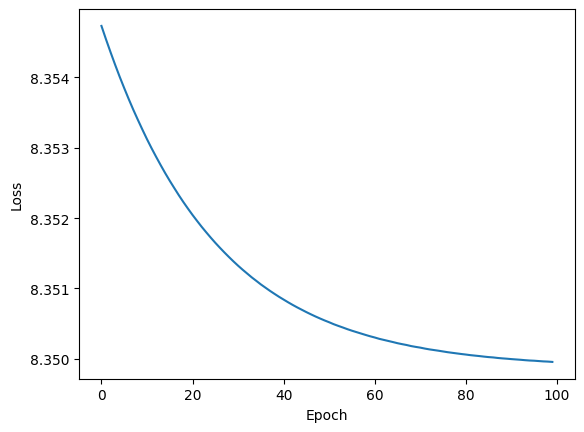

In [20]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

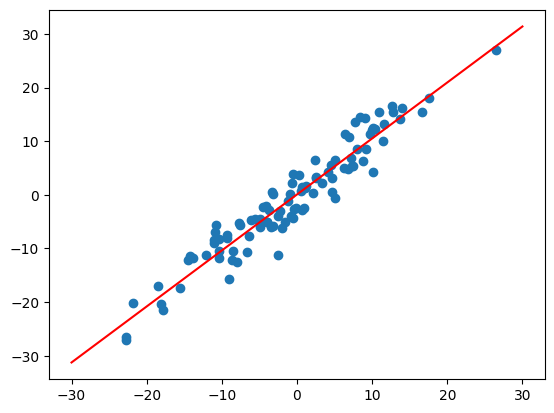

In [22]:
plot_fit("Trained Model")